In [1]:
import sys
import re
import numpy as np
import scipy
import io
from scipy import io
import math
import itertools
from itertools import combinations 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import statsmodels.stats.proportion
import seaborn as sns
import scanpy as sc
import GEOparse

In [2]:
def types_dict(path, sep=',', header=0):
    df = pd.read_csv(path, nrows=3, sep=sep, header=header)
    for i in df.columns[1:]:
        df[i] = pd.to_numeric(df[i], downcast='unsigned')
    dtypes = df.dtypes
    colnames = dtypes.index
    types = [i.name for i in dtypes.values]
    column_types = dict(zip(colnames, types))
    return(column_types)

In [3]:
gsm_dict = {
    'GSM4453751': 'H1CD73dpS1',
    'GSM4453752': 'H1CD90S1',
    'GSM4453753': 'H2Fovea1S1',
    'GSM4453754': 'H2Fovea2S1',
    'GSM4453755': 'H3CD73dpS1',
    'GSM4453756': 'H3CD73dpS2',
    'GSM4453757': 'H3CD90S1',
    'GSM4453758': 'H3CD90S2',
    'GSM4453759': 'H3FoveaS1',
    'GSM4453760': 'H3FoveaS2',
    'GSM4453761': 'H3FoveaS3',
    'GSM4453762': 'H4FoveaS1',
    'GSM4453763': 'H5FoveaS1',
    'GSM4453764': 'H5FoveaS2',
    'GSM4453765': 'H5FoveaS3',
    'GSM4453766': 'H5FoveaS4',
    'GSM4453767': 'H5FoveaS5',
    'GSM4453768': 'H9FoveaS1',
    'GSM4453769': 'H11FoveaS1'
}
gsm_dict = {value:key for (key,value) in gsm_dict.items()}

In [63]:
pathdir = "./rawData/"

i='GSE148077_count_mat_donor_H1.csv'
print("starting "+i)
typedict=types_dict(pathdir+i, sep=',', header=0)
print("dict")
expr = pd.DataFrame(pd.read_csv(pathdir+i, sep = ',', header=0, dtype=typedict))   
print("read")
print("finished "+i)


files = ['GSE148077_count_mat_donor_H2.csv','GSE148077_count_mat_donor_H3.csv',\
         'GSE148077_count_mat_donor_H4.csv', 'GSE148077_count_mat_donor_H5.csv', \
         'GSE148077_count_mat_donor_H9.csv','GSE148077_count_mat_donor_H11.csv']

for i in files:
    print("starting "+i)
    typedict=types_dict(pathdir+i, sep=',', header=0)
    print("dict")
    df = pd.DataFrame(pd.read_csv(pathdir+i, sep = ',', header=0, dtype=typedict))   
    print("read")
    expr = pd.merge(expr, df, on='Unnamed: 0', how="inner")
    print("merged")
    print("finished "+i)

genes = pd.DataFrame()
genes["ProbeID"] = expr['Unnamed: 0']
genes["Name"] = expr['Unnamed: 0']

count_mtx=expr.iloc[:,1:]
adata = sc.AnnData(count_mtx.T)
print("adata tranformed")
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
print("normalized")
count_mtx = pd.DataFrame(adata.X)
count_mtx = count_mtx.T
print("finished")
count_mtx

starting GSE148077_count_mat_donor_H1.csv
dict
read
finished GSE148077_count_mat_donor_H1.csv
starting GSE148077_count_mat_donor_H2.csv
dict
read
merged
finished GSE148077_count_mat_donor_H2.csv
starting GSE148077_count_mat_donor_H3.csv
dict
read
merged
finished GSE148077_count_mat_donor_H3.csv
starting GSE148077_count_mat_donor_H4.csv
dict
read
merged
finished GSE148077_count_mat_donor_H4.csv
starting GSE148077_count_mat_donor_H5.csv
dict
read
merged
finished GSE148077_count_mat_donor_H5.csv
starting GSE148077_count_mat_donor_H9.csv
dict
read
merged
finished GSE148077_count_mat_donor_H9.csv
starting GSE148077_count_mat_donor_H11.csv
dict
read
merged
finished GSE148077_count_mat_donor_H11.csv
adata tranformed
normalized
finished


0         1         2      3      4         5      6      7      \
0      0.000000  0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0   
1      0.000000  0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0   
2      0.000000  0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0   
3      0.000000  0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0   
4      0.000000  0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0   
...         ...       ...       ...    ...    ...       ...    ...    ...   
33655  0.000000  0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0   
33656  0.000000  0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0   
33657  0.000000  0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0   
33658  5.449041  6.134506  6.131066    0.0    0.0  5.139528    0.0    0.0   
33659  0.000000  0.000000  0.000000    0.0    0.0  0.000000    0.0    0.0   

       8         9      ...  86243  86244     86245  86246  86247     86248  \
0        0.0  0.000000  ...    0.0    0.0  0.000000    0.0    0.0  0.000000   
1        0.0  0.000000  ...    0.0    0.0  0.000000    0.0    0.0  0.000000   
2        0.0  0.000000  ...    0.0    0.0  0.000000    0.0    0.0  0.000000   
3        0.0  0.000000  ...    0.0    0.0  0.000000    0.0    0.0  0.000000   
4        0.0  0.000000  ...    0.0    0.0  0.000000    0.0    0.0  0.000000   
...      ...       ...  ...    ...    ...       ...    ...    ...       ...   
33655    0.0  0.000000  ...    0.0    0.0  0.000000    0.0    0.0  0.000000   
33656    0.0  0.000000  ...    0.0    0.0  0.000000    0.0    0.0  0.000000   
33657    0.0  0.000000  ...    0.0    0.0  0.000000    0.0    0.0  0.000000   
33658    0.0  6.521248  ...    0.0    0.0  5.867841    0.0    0.0  5.687961   
33659    0.0  0.000000  ...    0.0    0.0  0.000000    0.0    0.0  0.000000   

       86249  86250  86251     86252  
0        0.0    0.0    0.0  0.000000  
1        0.0    0.0    0.0  0.000000  
2        0.0    0.0    0.0  0.000000  
3        0.0    0.0    0.0  0.000000  
4        0.0    0.0    0.0  0.000000  
...      ...    ...    ...       ...  
33655    0.0    0.0    0.0  0.000000  
33656    0.0    0.0    0.0  0.000000  
33657    0.0    0.0    0.0  0.000000  
33658    0.0    0.0    0.0  5.303305  
33659    0.0    0.0    0.0  0.000000  

[33660 rows x 86253 columns]

In [ ]:
print("starting")
count_mtx.columns = expr.columns[1:]
print("columns")
count_mtx = pd.concat([genes, count_mtx], axis=1)
print("concatenated")

print("starting")
count_mtx.to_csv("./GSE148077-GPL16791-expr.txt", header=True, index=False, sep='\t')
print("exported")

%run process.py

starting


In [132]:
count_mtx

ProbeID            Name  H1CD73dpS1_AACACGTGTCAGAGGT-1  \
0        RP11-34P13.3    RP11-34P13.3                       0.000000   
1             FAM138A         FAM138A                       0.000000   
2               OR4F5           OR4F5                       0.000000   
3        RP11-34P13.7    RP11-34P13.7                       0.000000   
4        RP11-34P13.8    RP11-34P13.8                       0.000000   
...               ...             ...                            ...   
33655         SPATA13         SPATA13                       0.000000   
33656         TBC1D26         TBC1D26                       0.000000   
33657         TIMM10B         TIMM10B                       0.000000   
33658          TMBIM4          TMBIM4                       5.449041   
33659  TMEM256-PLSCR3  TMEM256-PLSCR3                       0.000000   

       H1CD73dpS1_AACTCCCTCAGCCTAA-1  H1CD73dpS1_ACACTGATCTGTCCGT-1  \
0                           0.000000                       0.000000   
1                           0.000000                       0.000000   
2                           0.000000                       0.000000   
3                           0.000000                       0.000000   
4                           0.000000                       0.000000   
...                              ...                            ...   
33655                       0.000000                       0.000000   
33656                       0.000000                       0.000000   
33657                       0.000000                       0.000000   
33658                       6.134506                       6.131066   
33659                       0.000000                       0.000000   

       H1CD73dpS1_ACCAGTACAAGTAGTA-1  H1CD73dpS1_ACGCCGATCTCACATT-1  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
33655                            0.0                            0.0   
33656                            0.0                            0.0   
33657                            0.0                            0.0   
33658                            0.0                            0.0   
33659                            0.0                            0.0   

       H1CD73dpS1_ACGGCCAAGATCTGCT-1  H1CD73dpS1_AGCAGCCGTAATCACC-1  \
0                           0.000000                            0.0   
1                           0.000000                            0.0   
2                           0.000000                            0.0   
3                           0.000000                            0.0   
4                           0.000000                            0.0   
...                              ...                            ...   
33655                       0.000000                            0.0   
33656                       0.000000                            0.0   
33657                       0.000000                            0.0   
33658                       5.139528                            0.0   
33659                       0.000000                            0.0   

       H1CD73dpS1_AGCCTAATCCTGCTTG-1  ...  H11FoveaS1_TTCTAACAGGCGCTTC-1  \
0                                0.0  ...                            0.0   
1                                0.0  ...                            0.0   
2                                0.0  ...                            0.0   
3                                0.0  ...                            0.0   
4                                0.0  ...                            0.0   
...                              ...  ...                            ...   
33655                            0.0  ...                 

In [110]:
celltypes_dict = {
    'Astrocytes':'Astrocytes', 'BB+GB*':"Bipolar Cells", 'DB1':"Bipolar Cells", 'DB2':"Bipolar Cells",\
    'DB3a':"Bipolar Cells", 'DB3b':"Bipolar Cells", 'DB4':"Bipolar Cells", 'DB5*':"Bipolar Cells", \
    'DB6':"Bipolar Cells", 'Endothelium':"Endothelium", 'FMB':"Bipolar Cells", 'Gaba1':"Amacrine Cells", \
    'Gaba10':"Amacrine Cells", 'Gaba11':"Amacrine Cells",'Gaba12':"Amacrine Cells", 'Gaba13':"Amacrine Cells",\
    'Gaba14':"Amacrine Cells", 'Gaba15':"Amacrine Cells", 'Gaba16':"Amacrine Cells", 'Gaba17':"Amacrine Cells",
    'Gaba2':"Amacrine Cells", 'Gaba3':"Amacrine Cells", 'Gaba4':"Amacrine Cells", 'Gaba5':"Amacrine Cells",\
    'Gaba6':"Amacrine Cells", 'Gaba7':"Amacrine Cells", 'Gaba8':"Amacrine Cells", 'Gaba9':"Amacrine Cells",\
    'Gly1':"Amacrine Cells", 'Gly2':"Amacrine Cells", 'Gly3':"Amacrine Cells", 'Gly4':"Amacrine Cells",\
    'Gly5':"Amacrine Cells", 'Gly6':"Amacrine Cells", 'Gly7':"Amacrine Cells", 'Gly8':"Amacrine Cells",\
    'H1':"Horizontal", 'H2':"Horizontal", 'IMB':"Bipolar Cells", 'MG_OFF':"Unknown", 'MG_ON':"Unknown", 'MicroGlia':'Microglia',
       'Muller':"Muller", 'OFFx':"Bipolar Cells", 'PG_OFF':"Unknown", 'PG_ON':"Unknown", 'RB1':"Bipolar Cells", \
    'RGC10':"Retinal Ganglion Cells",'RGC11':"Retinal Ganglion Cells",'RGC12':"Retinal Ganglion Cells",\
    'RGC5':"Retinal Ganglion Cells", 'RGC6':"Retinal Ganglion Cells", 'RGC7':"Retinal Ganglion Cells", \
    'RGC8':"Retinal Ganglion Cells", 'RGC9':"Retinal Ganglion Cells", 'Rods':"Rods", 'mlCones':"Cones",
       'sCones':"Cones"     
}

In [121]:
#Complete survival file
surv = pd.read_csv("./GSE148077-GPL16791-survival.txt", sep="\t")
clusters = pd.read_csv("./SCP839/metadata/Human_retina_combined_all_meta.csv", sep=",")
clusters.drop(0, axis=0, inplace=True)
clusters["c title"] = [clusters.iloc[i,0].split("_")[0] for i in range(len(clusters.index))]
clusters['c cell type'] = [celltypes_dict[i] for i in clusters['Cluster']]
cols = ['ArrayID', 'c cluster', 'c title', 'c cell type']
clusters
surv = pd.merge(surv,clusters,on="c title",how="outer")
cols = ['NAME', 'time', 'status', 'c title', 'c source_name (ch1)',
       'c organism (ch1)', 'c cell type (ch1)',
       'c molecule (ch1)', 'Cluster', 'c cell type']
surv = surv[cols]
surv.columns = ['ArrayID', 'time', 'status', 'c title', 'c source_name','c organism', 'c type','c molecule', 'c cluster', 'c cell type']
surv

ArrayID  time  status     c title  \
0      H1CD73dpS1_AACACGTGTCAGAGGT-1   NaN     NaN  H1CD73dpS1   
1      H1CD73dpS1_AACTCCCTCAGCCTAA-1   NaN     NaN  H1CD73dpS1   
2      H1CD73dpS1_ACACTGATCTGTCCGT-1   NaN     NaN  H1CD73dpS1   
3      H1CD73dpS1_ACCAGTACAAGTAGTA-1   NaN     NaN  H1CD73dpS1   
4      H1CD73dpS1_ACGCCGATCTCACATT-1   NaN     NaN  H1CD73dpS1   
...                              ...   ...     ...         ...   
86248  H11FoveaS1_TTGTGGATCCGTATAG-1   NaN     NaN  H11FoveaS1   
86249  H11FoveaS1_TTGTTCAGTAAGTAGT-1   NaN     NaN  H11FoveaS1   
86250  H11FoveaS1_TTGTTTGAGATGGTCG-1   NaN     NaN  H11FoveaS1   
86251  H11FoveaS1_TTTGACTTCCAACTAG-1   NaN     NaN  H11FoveaS1   
86252  H11FoveaS1_TTTGGAGGTTGCTCAA-1   NaN     NaN  H11FoveaS1   

           c source_name    c organism  \
0      Peripheral retina  Homo sapiens   
1      Peripheral retina  Homo sapiens   
2      Peripheral retina  Homo sapiens   
3      Peripheral retina  Homo sapiens   
4      Peripheral retina  Homo sapiens   
...                  ...           ...   
86248       Fovea retina  Homo sapiens   
86249       Fovea retina  Homo sapiens   
86250       Fovea retina  Homo sapiens   
86251       Fovea retina  Homo sapiens   
86252       Fovea retina  Homo sapiens   

                                                  c type c molecule  \
0      Peripheral retina cells depleted by anti-CD73 ...  total RNA   
1      Peripheral retina cells depleted by anti-CD73 ...  total RNA   
2      Peripheral retina cells depleted by anti-CD73 ...  total RNA   
3      Peripheral retina cells depleted by anti-CD73 ...  total RNA   
4      Peripheral retina cells depleted by anti-CD73 ...  total RNA   
...                                                  ...        ...   
86248                                 Fovea retina cells  total RNA   
86249                                 Fovea retina cells  total RNA   
86250                                 Fovea retina cells  total RNA   
86251                                 Fovea retina cells  total RNA   
86252                                 Fovea retina cells  total RNA   

       c cluster c cell type  
0           Rods        Rods  
1           Rods        Rods  
2           Rods        Rods  
3           Rods        Rods  
4        mlCones       Cones  
...          ...         ...  
86248  MicroGlia   Microglia  
86249     Muller      Muller  
86250     Muller      Muller  
86251     Muller      Muller  
86252  MicroGlia   Microglia  

[86253 rows x 10 columns]

In [131]:
barcodes = pd.DataFrame()
barcodes["ArrayId"] = surv["ArrayID"]
barcodes["ClinicalHeader"] = [i.split("_")[0] for i in barcodes["ArrayId"]]
ih = pd.read_csv("./GSE148077-GPL16791-ih.txt", sep="\t")
ih = pd.merge(ih, barcodes, on="ClinicalHeader", how="inner")
cols = ['ArrayId', 'ArrayHeader', 'ClinicalHeader']
ih = ih[cols]
ih.columns = ['ArrayID', 'ArrayHeader', 'ClinicalHeader']
ih

ArrayID ArrayHeader ClinicalHeader
0      H1CD73dpS1_AACACGTGTCAGAGGT-1  GSM4453751     H1CD73dpS1
1      H1CD73dpS1_AACTCCCTCAGCCTAA-1  GSM4453751     H1CD73dpS1
2      H1CD73dpS1_ACACTGATCTGTCCGT-1  GSM4453751     H1CD73dpS1
3      H1CD73dpS1_ACCAGTACAAGTAGTA-1  GSM4453751     H1CD73dpS1
4      H1CD73dpS1_ACGCCGATCTCACATT-1  GSM4453751     H1CD73dpS1
...                              ...         ...            ...
86248  H11FoveaS1_TTGTGGATCCGTATAG-1  GSM4453769     H11FoveaS1
86249  H11FoveaS1_TTGTTCAGTAAGTAGT-1  GSM4453769     H11FoveaS1
86250  H11FoveaS1_TTGTTTGAGATGGTCG-1  GSM4453769     H11FoveaS1
86251  H11FoveaS1_TTTGACTTCCAACTAG-1  GSM4453769     H11FoveaS1
86252  H11FoveaS1_TTTGGAGGTTGCTCAA-1  GSM4453769     H11FoveaS1

[86253 rows x 3 columns]

In [140]:
#Write survival and ih
ih.to_csv("./GSE148077-GPL16791-2-ih.txt", header=True, index=False, sep='\t')
surv.to_csv("./GSE148077-GPL16791-2-survival.txt", header=True, index=False, sep='\t')

In [135]:
#Finish adata object
adata.obs['arr'] = np.array(count_mtx.columns[2:])
adata.var['gene_names'] = np.array(count_mtx["Name"])
adata.var_names = adata.var["gene_names"]
adata.obs_names = adata.obs["arr"]
df = pd.read_csv("./GSE148077-GPL16791-2-survival.txt", sep="\t")
print("Read surv file")
df.index = df.iloc[:,0]
for k in df.columns:
    k1 = re.sub("^c ", "", k)
    k1 = re.sub("^n ", "", k1)
    val = [df[k][i] if i in df.index else '' for i in adata.obs['arr']]
    adata.obs[k1] = val
    print("read column "+k)

Read surv file
read column ArrayID
read column time
read column status
read column c title
read column c source_name
read column c organism
read column c type
read column c molecule
read column c cluster
read column c cell type


In [136]:
adata

AnnData object with n_obs × n_vars = 86253 × 33660
    obs: 'arr', 'ArrayID', 'time', 'status', 'title', 'source_name', 'organism', 'type', 'molecule', 'cluster', 'cell type'
    var: 'gene_names'
    uns: 'log1p'

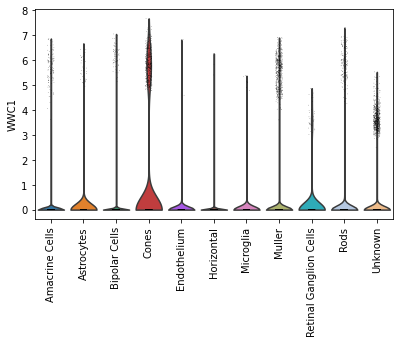

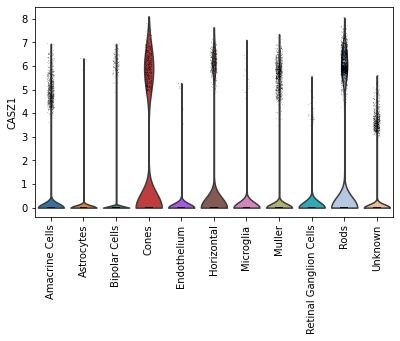

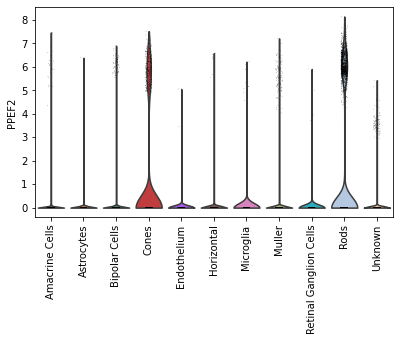

In [150]:
sc.pl.violin(adata, 'WWC1', groupby="cell type", rotation=90, size=0.5, save="GSE148077_WWC1_plots.pdf")
sc.pl.violin(adata, 'CASZ1', groupby="cell type", rotation=90, size=0.5, save="GSE148077_CASZ1_plots.pdf")
sc.pl.violin(adata, 'PPEF2', groupby="cell type", rotation=90, size=0.5, save="GSE148077_PPEF2_plots.pdf")

In [1]:
sc.set_figure_params(dpi_save=500)
sc.pl.violin(adata, 'WWC1', groupby="cell type", rotation=90, size=0.5, save="GSE148077_WWC1_plots.jpeg")
sc.pl.violin(adata, 'CASZ1', groupby="cell type", rotation=90, size=0.5, save="GSE148077_CASZ1_plots.jpeg")
sc.pl.violin(adata, 'PPEF2', groupby="cell type", rotation=90, size=0.5, save="GSE148077_PPEF2_plots.jpeg")

NameError: name 'sc' is not defined